In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine

wine = load_wine()

wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)

wine_df['target'] = wine.target

print(wine_df.head())

#print(wine_df.describe())
X = wine.data  # Features
y = wine.target  # Target labels


   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0          

In [3]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Convert the standardized features to a DataFrame for easier inspection
wine_standardized_df = pd.DataFrame(data=X_standardized, columns=wine.feature_names)

# Display the first 5 rows of the standardized dataset
print(wine_standardized_df.head())


    alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0  1.518613   -0.562250  0.232053          -1.169593   1.913905   
1  0.246290   -0.499413 -0.827996          -2.490847   0.018145   
2  0.196879    0.021231  1.109334          -0.268738   0.088358   
3  1.691550   -0.346811  0.487926          -0.809251   0.930918   
4  0.295700    0.227694  1.840403           0.451946   1.281985   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0       0.808997    1.034819             -0.659563         1.224884   
1       0.568648    0.733629             -0.820719        -0.544721   
2       0.808997    1.215533             -0.498407         2.135968   
3       2.491446    1.466525             -0.981875         1.032155   
4       0.808997    0.663351              0.226796         0.401404   

   color_intensity       hue  od280/od315_of_diluted_wines   proline  
0         0.251717  0.362177                      1.847920  1.013009  
1        -0.293321  0.406051

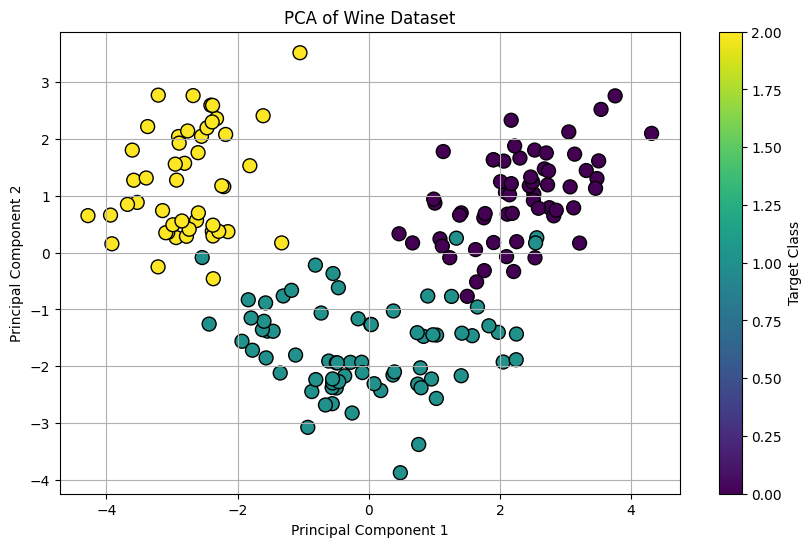

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA to reduce the dataset to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standardized)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Target'] = y

# Plotting the PCA results
plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], c=pca_df['Target'], cmap='viridis', edgecolor='k', s=100)
plt.title('PCA of Wine Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Target Class')
plt.grid()
plt.show()


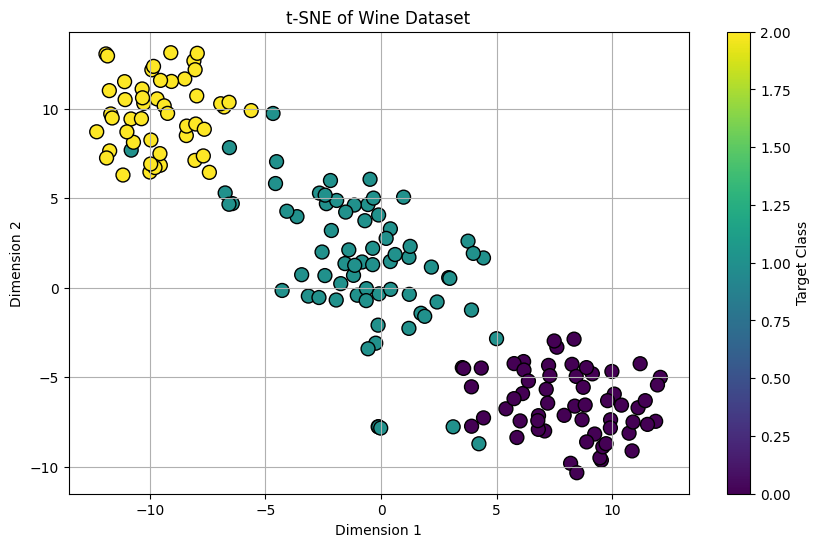

In [5]:
from sklearn.manifold import TSNE

# Apply t-SNE to reduce the dataset to 2 dimensions
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_standardized)

# Create a DataFrame for the t-SNE results
tsne_df = pd.DataFrame(data=X_tsne, columns=['Dimension 1', 'Dimension 2'])
tsne_df['Target'] = y

# Plotting the t-SNE results
plt.figure(figsize=(10, 6))
scatter = plt.scatter(tsne_df['Dimension 1'], tsne_df['Dimension 2'], c=tsne_df['Target'], cmap='viridis', edgecolor='k', s=100)
plt.title('t-SNE of Wine Dataset')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.colorbar(scatter, label='Target Class')
plt.grid()
plt.show()


In [6]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score


# K-Means clustering on the original dataset
kmeans_original = KMeans(n_clusters=3, random_state=42)
y_kmeans_original = kmeans_original.fit_predict(X_standardized)

# K-Means clustering on the PCA-reduced dataset
kmeans_pca = KMeans(n_clusters=3, random_state=42)
y_kmeans_pca = kmeans_pca.fit_predict(X_pca)

# Evaluate clustering performance using silhouette score
silhouette_original = silhouette_score(X_standardized, y_kmeans_original)
silhouette_pca = silhouette_score(X_pca, y_kmeans_pca)

# Evaluate clustering performance using adjusted Rand index
ari_original = adjusted_rand_score(y, y_kmeans_original)
ari_pca = adjusted_rand_score(y, y_kmeans_pca)

# Print the results
print(f'Silhouette Score (Original Data): {silhouette_original:.4f}')
print(f'Silhouette Score (PCA Data): {silhouette_pca:.4f}')
print(f'Adjusted Rand Index (Original Data): {ari_original:.4f}')
print(f'Adjusted Rand Index (PCA Data): {ari_pca:.4f}')


Silhouette Score (Original Data): 0.2849
Silhouette Score (PCA Data): 0.5602
Adjusted Rand Index (Original Data): 0.8975
Adjusted Rand Index (PCA Data): 0.8962
